# Import Libraries

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math, config

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

%load_ext autotime

In [2]:
# Read Daily Data and select Asset 1 
path = config.path_ARIMA

df01 = pd.read_csv(f'{path}/All_2017_01_01_to_2023_05_31_daily.csv')
df = df01.loc[df01.id_asset == 1]
df.index = df['timestamp']
df.head(3)

,id_asset,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
timestamp,,,,,,,,,,,,,
2017-08-17,1,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-17 23:59:59.999,3.454770e+06,3427,616.248541,2.678216e+06,0.0
2017-08-18,1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-18 23:59:59.999,5.086958e+06,5233,972.868710,4.129123e+06,0.0
2017-08-19,1,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-19 23:59:59.999,1.549484e+06,2153,274.336042,1.118002e+06,0.0


time: 89.3 ms


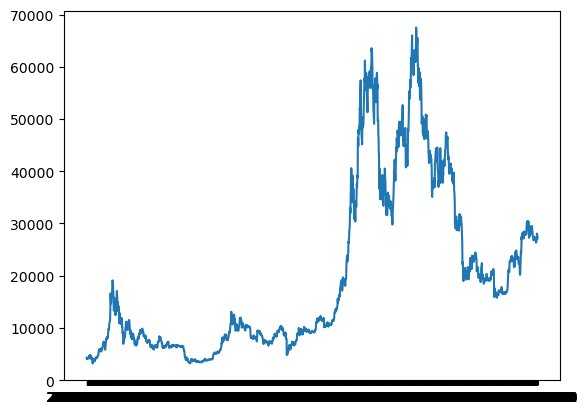

time: 12.9 s


In [3]:
# Plot 01- Close Price
plt.plot(df.index, df['close'])
plt.show()

# Train Test Split

In [4]:
# Train test split
to_row = int(len(df)*0.9) #==> get 90% data for train , 10% data for test

train_df = df[0:to_row]['close']
test_df = df[to_row:]['close']

train_data = list(train_df)
test_data = list(test_df)
print(len(train_data), len(test_data))
train_data[:5]

1902 212


[4285.08, 4108.37, 4139.98, 4086.29, 4016.0]

time: 8.1 ms


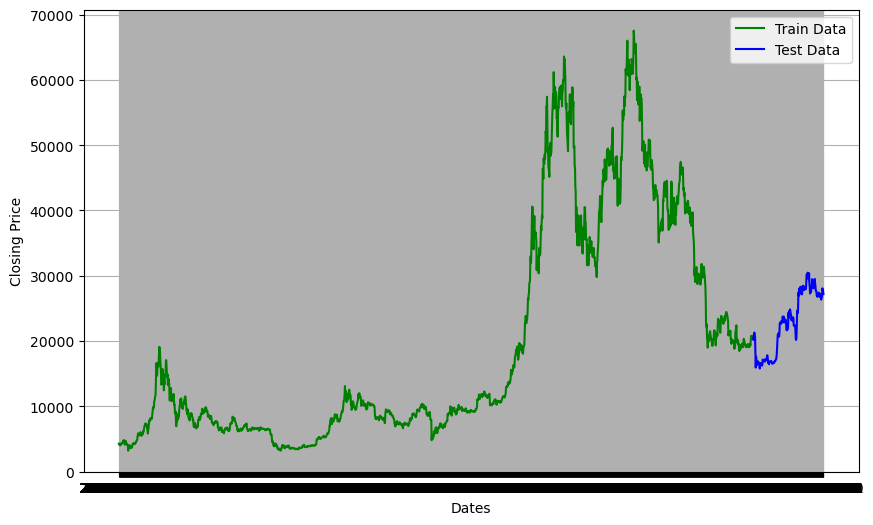

time: 14.3 s


In [5]:
# Plot 02 - splited data into a train and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.plot(train_df, 'green', label= 'Train Data')
plt.plot(test_df, 'blue', label= 'Test Data')
plt.legend()
plt.show()

# Model Prediction with ARIMA

In [6]:
# Model Predictin with ARIMA
model_predictions = []
n_test_obser = len(test_data)
n = 0

for i in range(n_test_obser):
    model = ARIMA(train_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)   # ==> Add actual value to train data , we need to append the value for forecasting the next day 
    n+=1
    
    if n % 10 == 0:
        print(f'{n} ,yhat = {yhat} , actual value = {actual_test_value}')

10 ,yhat = 15982.652884103405 , actual value = 17601.15
20 ,yhat = 16694.25150580058 , actual value = 16280.23
30 ,yhat = 16431.935752572088 , actual value = 17163.64
40 ,yhat = 17129.631249507493 , actual value = 17127.49
50 ,yhat = 16430.656134547557 , actual value = 16895.56
60 ,yhat = 16627.97514690085 , actual value = 16607.48
70 ,yhat = 17123.81845118531 , actual value = 17178.26
80 ,yhat = 20697.666464596066 , actual value = 21071.59
90 ,yhat = 23036.010134897064 , actual value = 23742.3
100 ,yhat = 23211.542248850772 , actual value = 22963.0
110 ,yhat = 24600.286725831902 , actual value = 24631.95
120 ,yhat = 23471.5086354988 , actual value = 23141.57
130 ,yhat = 20400.237654611945 , actual value = 20150.69
140 ,yhat = 28023.950127135053 , actual value = 27717.01
150 ,yhat = 28307.786171456413 , actual value = 28028.53
160 ,yhat = 27933.662987159347 , actual value = 28323.76
170 ,yhat = 30342.61916828854 , actual value = 28797.1
180 ,yhat = 29348.02264918769 , actual value = 29

## Model Summary

In [7]:
# Print Model Summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2113
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -17523.904
Date:                Tue, 20 Jun 2023   AIC                          35057.808
Time:                        06:31:18   BIC                          35086.085
Sample:                             0   HQIC                         35068.162
                               - 2113                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0328      0.014     -2.373      0.018      -0.060      -0.006
ar.L2          0.0036      0.014      0.265      0.791      -0.023       0.030
ar.L3          0.0261      0.014      1.821      0.0

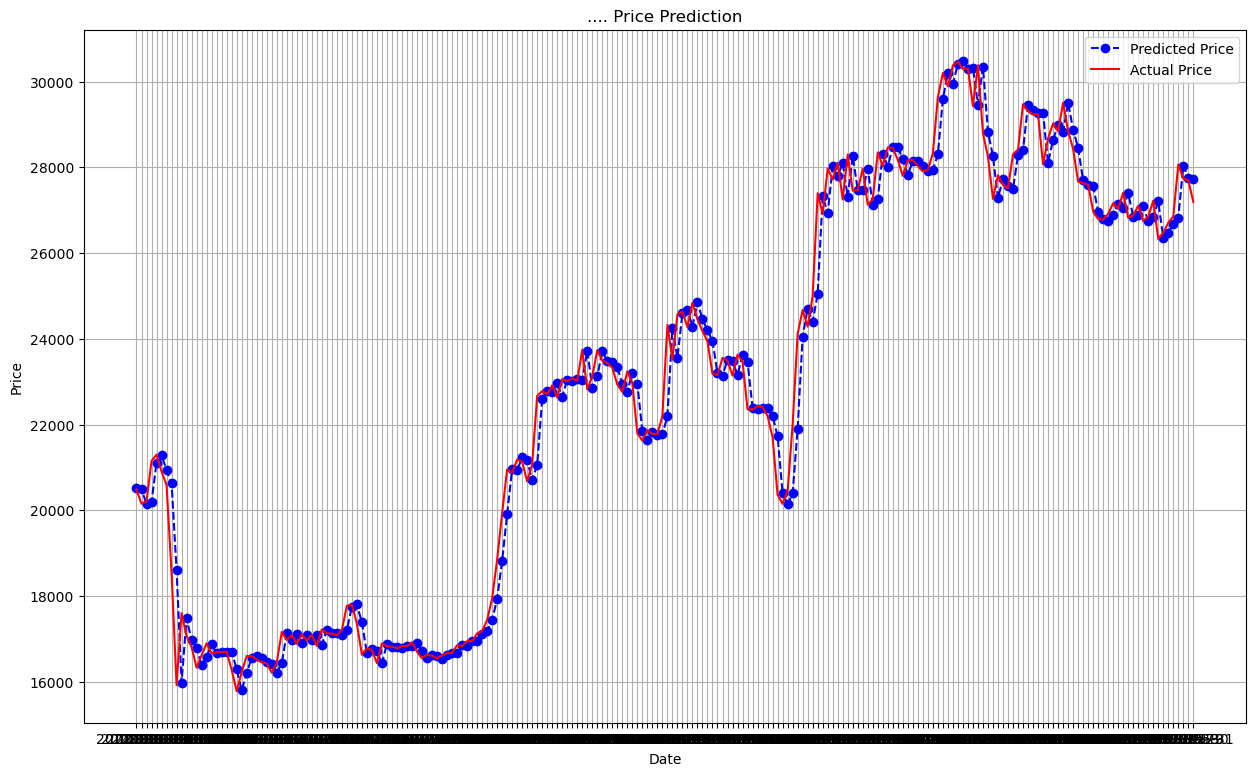

time: 1.78 s


In [8]:
# Plot 03 - Predicted and Actual Price
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[to_row:].index

plt.plot(data_range, model_predictions, 'blue', marker ='o', linestyle = 'dashed', label = 'Predicted Price')
plt.plot(data_range, test_data, 'red', label = 'Actual Price' )

plt.title('.... Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [9]:
# report performance 
difference = np.abs(np.array(model_predictions) - np.array(test_data))
test_pred = np.abs(test_data)

mape = np.mean(difference / test_pred ) # Mean absolute percentage error

print(f'MAPE : {mape}') 
# Around 1.78% MAPE ==> The model is 98.22% accurate in predicting the test set observation.

MAPE : 0.017834806212852033
time: 1.96 ms


In [10]:
# Model Score  AIC, BIC
print("AIC:", model_fit.aic)
print("BIC:", model_fit.bic)

AIC: 35057.80755635882
BIC: 35086.08450958295
time: 1.12 ms


# Model Tunning

In [11]:
# Model Tuning with AIC
import itertools
import statsmodels.api as sm
import numpy as np

# Generate parameter combinations for grid search
p_values = range(0, 5)  # Range of p values
d_values = range(0, 2)  # Range of d values
q_values = range(0, 2)  # Range of q values

# Variables to store the best parameters and best performance metric value
best_aic = float("inf")  # Lowest AIC value
best_params = None  # Best parameters

# Try different combinations of hyperparameters using grid search
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                to_row = int(len(df)*0.9) #==> get 90% data for train , 10% data for test
                
                train_df = df[0:to_row]['close']
                test_df = df[to_row:]['close']

                train_data = list(train_df)
                test_data = list(test_df)
                
                # Create and fit the ARIMA model
                model_predictions = []
                n_test_obser = len(test_data)
                n = 0

                for i in range(n_test_obser):
                    model = sm.tsa.ARIMA(train_data, order=(p, d, q))
                    model_fit = model.fit()
                    output = model_fit.forecast()
                    yhat = output[0]
                    model_predictions.append(yhat)
                    actual_test_value = test_data[i]
                    train_data.append(actual_test_value)
                    n+=1
                    #print(n, ' : ', p,d,q, "AIC:", model_fit.aic)

                # Check AIC value and update the best if necessary
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_params = (p, d, q)
                    print(p, d, q , model_fit.aic)

            except:
                continue

# Print the best parameters and best AIC value
print("Best parameters: ", best_params)
print("Best AIC value: ", best_aic)

0 0 0 61030.40941376936
0 0 1 44220.863807884205
0 1 0 35055.110129422435
0 1 1 35054.94387723971
1 1 0 35054.922055849434
Best parameters:  (1, 1, 0)
Best AIC value:  35054.922055849434
time: 20min 30s


In [12]:
# Print the best parameters and best AIC value
print("Best parameters: ", best_params)
print("Best AIC value: ", best_aic)

Best parameters:  (1, 1, 0)
Best AIC value:  35054.922055849434
time: 1.94 ms


## Create Model with best Parameters

In [13]:
# Create Model with best Parameters
# Train test split
to_row = int(len(df)*0.9) #==> get 90% data for train , 10% data for test

train_df = df[0:to_row]['close']
test_df = df[to_row:]['close']

train_data = list(train_df)
test_data = list(test_df)


# Model Predictin with ARIMA
model_predictions = []
n_test_obser = len(test_data)
n = 0

for i in range(n_test_obser):
    model = ARIMA(train_data, order = (1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)   # ==> Add actual value to train data , we need to append the value for forecasting the next day 
    n+=1
    
    if n % 10 == 0:
        print(f'{n} ,yhat = {yhat} , actual value = {actual_test_value}')

10 ,yhat = 16004.405717031614 , actual value = 17601.15
20 ,yhat = 16700.67227471918 , actual value = 16280.23
30 ,yhat = 16434.834675065005 , actual value = 17163.64
40 ,yhat = 17131.77373910031 , actual value = 17127.49
50 ,yhat = 16448.89776846569 , actual value = 16895.56
60 ,yhat = 16630.57948398754 , actual value = 16607.48
70 ,yhat = 17121.64784211705 , actual value = 17178.26
80 ,yhat = 20692.176762078165 , actual value = 21071.59
90 ,yhat = 23024.244655290462 , actual value = 23742.3
100 ,yhat = 23225.012874386142 , actual value = 22963.0
110 ,yhat = 24535.370126036443 , actual value = 24631.95
120 ,yhat = 23494.152434671705 , actual value = 23141.57
130 ,yhat = 20405.818143266348 , actual value = 20150.69
140 ,yhat = 27941.077917663217 , actual value = 27717.01
150 ,yhat = 28314.651747102136 , actual value = 28028.53
160 ,yhat = 27937.372280422172 , actual value = 28323.76
170 ,yhat = 30350.255326099825 , actual value = 28797.1
180 ,yhat = 29316.79014362058 , actual value = 2

In [14]:
# Model Score  AIC, BIC
print("AIC:", model_fit.aic)
print("BIC:", model_fit.bic)

AIC: 35054.922055849434
BIC: 35066.23283713908
time: 1.24 ms


In [15]:
# report performance tunned Model
difference = np.abs(np.array(model_predictions) - np.array(test_data))
test_pred = np.abs(test_data)

mape = np.mean(difference / test_pred ) # Mean absolute percentage error

print(f'MAPE : {mape}') 
# Around 1.78% MAPE ==> The model is 98.22% accurate in predicting the test set observation.

MAPE : 0.017888226372949977
time: 3.68 ms


## Model Summary with best Parameters

In [16]:
# Print Model Summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2113
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -17525.461
Date:                Tue, 20 Jun 2023   AIC                          35054.922
Time:                        07:01:39   BIC                          35066.233
Sample:                             0   HQIC                         35059.064
                               - 2113                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0321      0.014     -2.340      0.019      -0.059      -0.005
sigma2      9.447e+05   1.19e+04     79.564      0.000    9.21e+05    9.68e+05
Ljung-Box (L1) (Q):                   0.00   Jarque-

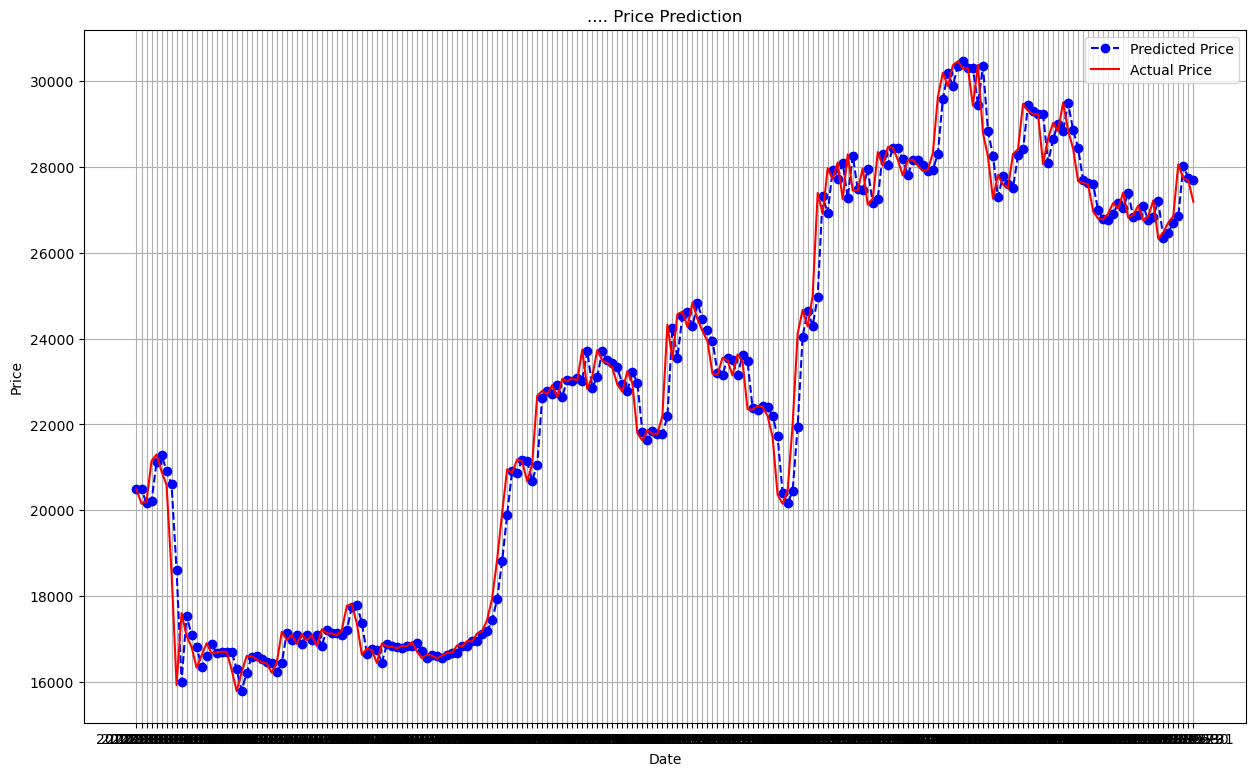

time: 1.74 s


In [17]:
# Plot 03 - Predicted and Actual Price
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[to_row:].index

plt.plot(data_range, model_predictions, 'blue', marker ='o', linestyle = 'dashed', label = 'Predicted Price')
plt.plot(data_range, test_data, 'red', label = 'Actual Price' )

plt.title('.... Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()